In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df_uk = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\df_uk_cleaned-2.xlsx')

#url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/CleanedDataUK.xlsx'
#df_uk = pd.read_excel(url)  # Works similarly for CSV

df_uk

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policy ma...
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...
...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...


In [4]:
# Read the bank rate file and create the data frame
#df_bank_rates = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\bank_rates_years_months-2.xlsx')
#https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx
#df_bank_rates = pd.read_csv(r'C:\Users\elif.ozkol\Desktop\LSE Project\bank_rates_years_months.xlsx')

url_unemployment = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/unemployment.csv'
df_unemployment = pd.read_csv(url_unemployment)  # Works similarly for CSV

df_unemployment

,Date,unemployment_rate
0,1990-01-01,6.9
1,1990-02-01,6.9
2,1990-03-01,6.9
3,1990-04-01,6.9
4,1990-05-01,6.9
...,...,...
416,2024-09-01,4.3
417,2024-10-01,4.4
418,2024-11-01,4.4
419,2024-12-01,4.4


In [5]:
df_unemployment['Date'] = pd.to_datetime(df_unemployment['Date'])
# Add 'Month' and 'Year' columns
df_unemployment['Month'] = df_unemployment['Date'].dt.strftime('%B')  # e.g., 'January', 'February'
df_unemployment['Year'] = df_unemployment['Date'].dt.year

df_unemployment

,Date,unemployment_rate,Month,Year
0,1990-01-01,6.9,January,1990
1,1990-02-01,6.9,February,1990
2,1990-03-01,6.9,March,1990
3,1990-04-01,6.9,April,1990
4,1990-05-01,6.9,May,1990
...,...,...,...,...
416,2024-09-01,4.3,September,2024
417,2024-10-01,4.4,October,2024
418,2024-11-01,4.4,November,2024
419,2024-12-01,4.4,December,2024


In [6]:
#df_unemployment.to_excel('unemployment rates with months and years.xlsx', index=False)

In [7]:
df_uk.loc[:, 'Month'] = df_uk['Month'].astype(str)
df_unemployment.loc[:, 'Month'] = df_unemployment['Month'].astype(str)

In [8]:
monthly_rates = (
    df_unemployment
    .groupby(['Year', 'Month'], as_index=False)
    .agg({'unemployment_rate': 'last'})
)

df_merged_by_month = df_uk.merge(
    monthly_rates,
    on=['Year', 'Month'],
    how='left'
).rename(columns={'unemployment_rate': 'UnemploymentRate'})

In [9]:
df_merged_by_month

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,6.2
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,6.2
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,6.2
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policy ma...,6.1
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,6.1
...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,3.7
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,3.7
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,3.8
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,3.9


In [10]:
#df_merged_by_month.to_excel('df_uk and unemployment rates.xlsx', index=False)

**Finbert**

In [11]:
# Import all the necessary packages.
#!pip install transformers
#!pip install torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import transformers
import nltk
nltk.download('punkt')

from transformers import BertTokenizer, BertForSequenceClassification

print(transformers.__version__)
print(torch.__version__)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4.51.3
2.7.0+cpu


In [12]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
model.eval()  # Set model to evaluation mode

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [13]:
def chunk_text(text, max_length=510):
    sentences = sent_tokenize(text)
    current_chunk = []
    chunks = []

    for sentence in sentences:
        current_chunk.append(sentence)
        tokenized = tokenizer(" ".join(current_chunk), return_tensors="pt", truncation=False)
        if tokenized['input_ids'].shape[1] > max_length:
            current_chunk.pop()
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

In [14]:
def analyse_sentiment(text):
    chunks = chunk_text(text)
    sentiments = []

    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiments.append(probs)

    avg_sentiments = np.mean(sentiments, axis=0)
    sentiment_series = pd.Series({
        'neutral_finbert': avg_sentiments[0],
        'positive_finbert': avg_sentiments[1],
        'negative_finbert': avg_sentiments[2],
        'polarity_score_finbert': avg_sentiments[1] - avg_sentiments[2]
    })
    return sentiment_series

In [15]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
#nltk.download('punkt')

tqdm.pandas()  # Enable progress bar
finbert_results = df_merged_by_month['Text'].progress_apply(lambda x: analyse_sentiment(str(x)))
df_merged_by_month = pd.concat([df_merged_by_month.reset_index(drop=True), finbert_results], axis=1)

100%|██████████████████████████████████████████████████████████████████████████████| 1209/1209 [21:19<00:00,  1.06s/it]


In [16]:
# full time data frame
df_merged_by_month

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...,6.2,0.689918,0.196695,0.113387,0.083308
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...,6.2,0.513907,0.484832,0.001261,0.483571
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...,6.2,0.853627,0.020861,0.125512,-0.104651
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policy ma...,6.1,0.983629,0.015370,0.001001,0.014368
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...,6.1,0.983659,0.015350,0.000991,0.014358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,3.7,0.790335,0.163924,0.045742,0.118182
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,3.7,0.483925,0.515084,0.000991,0.514093
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,3.8,0.867319,0.018150,0.114531,-0.096382
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,3.9,0.983664,0.015353,0.000983,0.014370


In [ ]:
# GFC and Eurozone  (1 Jan 2008 to 31 Dec 2012) data frame

In [23]:
# Filter the data for 1 Jan 2008 to 31 Dec 2012
df_merged_by_month_2008_2012 = df_merged_by_month[(df_uk['Year'] >= 2008) & (df_merged_by_month['Year'] <= 2012)]
df_merged_by_month_2008_2012

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert
288,r081028b_BOE,United Kingdom,2008-10-28,2008,October,Some Current Issues in UK Monetary Policy,Besley,No,ladies gentleman thank coming begin saying gra...,6.2,0.639250,0.281192,0.079558,0.201634
289,r081028a_BOE,United Kingdom,2008-10-28,2008,October,Rebuilding Confidence in the Financial System,Gieve,No,publishing today bi annual financial stability...,6.2,0.609212,0.016375,0.374413,-0.358038
290,r081029a_BOE,United Kingdom,2008-10-29,2008,October,Where next for the UK economy?,Blanchflower,No,two roads diverged wood took one less traveled...,6.2,0.488679,0.016742,0.494579,-0.477838
291,r081122a_BOE,United Kingdom,2008-11-22,2008,November,Some Lessons for Monetary Policy from the Rece...,Bean,No,present financial crisis many parents encompas...,6.4,0.748597,0.089094,0.162309,-0.073215
292,r081119a_BOE,United Kingdom,2008-11-19,2008,November,Learning from the Financial Crisis,Gieve,No,years sterling left erm successful stable life...,6.4,0.517952,0.033353,0.448695,-0.415342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,r120119a_BOE,United Kingdom,2012-01-19,2012,January,Accounting for bank uncertainty,Haldane,No,fair value accounting principles attack quarte...,8.3,0.978289,0.016098,0.005613,0.010485
549,r120925a_BOE,United Kingdom,2012-09-25,2012,September,"Developments in financial markets, monetary an...",Fisher,No,speeches available online gave speech state fi...,7.8,0.585458,0.023534,0.391008,-0.367474
550,r121214a_BOE,United Kingdom,2012-12-14,2012,December,Household behaviour and policy analysis,Weale,No,speeches available online thank much inviting ...,7.8,0.983455,0.015357,0.001188,0.014169
551,r121220a_BOE,United Kingdom,2012-12-20,2012,December,Bank share rating: buy!,Jenkins,No,speeches available online last night dream sha...,7.8,0.579686,0.184970,0.235345,-0.050375


In [ ]:
# Covid / Inflation crisis / gilt crisis (1 Jan 2020 to 31 Oct 2022) data frame

In [24]:
# Filter the data for 1 Jan 2020 to 31 Oct 2022
df_merged_by_month_2020_2022 = df_merged_by_month[(df_uk['Year'] >= 2020) & (df_merged_by_month['Year'] <= 2022)]
df_merged_by_month_2020_2022

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert
1042,r200123a_BOE,United Kingdom,2020-01-23,2020,January,Responding to leaps in payments: from unbundli...,Knowles,No,good morning would like thank westminster busi...,3.9,0.915931,0.077887,0.006182,0.071706
1043,r200205a_BOE,United Kingdom,2020-02-05,2020,February,Stress tests: a policymaker’s perspective,Kohn,No,simultaneous transparent bank stress tests one...,4.1,0.939940,0.049462,0.010598,0.038864
1044,r200211b_BOE,United Kingdom,2020-02-11,2020,February,Governance of financial globalisation,Cunliffe,No,jon cunliffe sets progress made challenges fac...,4.1,0.782458,0.215587,0.001954,0.213633
1045,r200211a_BOE,United Kingdom,2020-02-11,2020,February,Monetary policy in the intangible economy,Haskel,No,grateful marco garofalo jamie lenney invaluabl...,4.1,0.979114,0.015519,0.005367,0.010153
1046,r200930a_BOE,United Kingdom,2020-09-30,2020,September,Avoiding economic anxiety,Haldane,No,views expressed not necessarily bank england m...,5.2,0.884688,0.052770,0.062542,-0.009772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,3.7,0.790335,0.163924,0.045742,0.118182
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,3.7,0.483925,0.515084,0.000991,0.514093
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,3.8,0.867319,0.018150,0.114531,-0.096382
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,3.9,0.983664,0.015353,0.000983,0.014370


In [17]:
#df_merged_by_month.to_excel('unemployment rates and finbert-full time.xlsx', index=False)

In [20]:
# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month['Month'] = pd.Categorical(df_merged_by_month['Month'], categories=month_order, ordered=True)

monthly_avg = df_merged_by_month.groupby('Month', observed=True).agg({
    'UnemploymentRate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()
# Rename for clarity
monthly_avg.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg = monthly_avg.sort_values('Month')


monthly_avg

,Month,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,NumofSpeeches
0,January,5.728090,0.753708,0.157045,0.089247,0.067798,89
1,February,5.633028,0.758340,0.169604,0.072056,0.097548,109
2,March,5.753543,0.820822,0.124077,0.055101,0.068975,127
3,April,5.250617,0.718374,0.193003,0.088623,0.104380,81
4,May,5.612174,0.788119,0.148422,0.063459,0.084963,115
5,June,5.537209,0.772585,0.169258,0.058157,0.111100,129
6,July,5.157292,0.813791,0.141820,0.044389,0.097432,96
7,August,5.900000,0.791285,0.126022,0.082693,0.043329,27
8,September,5.601681,0.754893,0.144199,0.100908,0.043290,119
9,October,5.772143,0.795585,0.128467,0.075948,0.052518,140


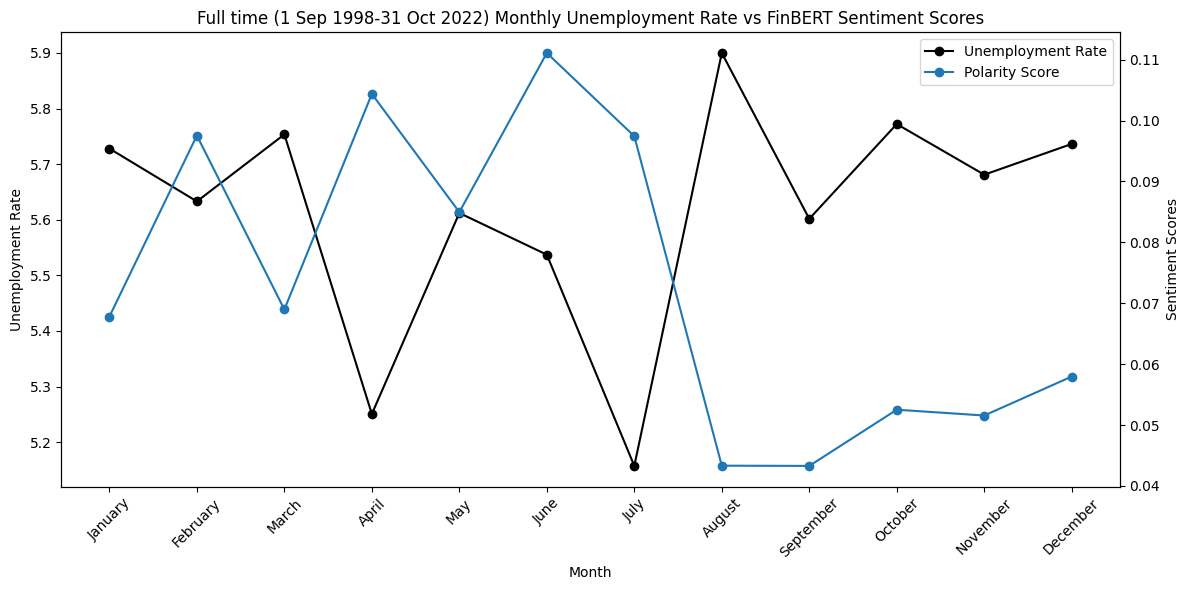

In [22]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Unemployment rate on primary y-axis
ax1.plot(monthly_avg['Month'], monthly_avg['UnemploymentRate'], marker='o', label='Unemployment Rate', color='black')
ax1.set_ylabel('Unemployment Rate')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)

# Sentiment scores on secondary y-axis
ax2 = ax1.twinx()
#ax2.plot(monthly_avg['Month'], monthly_avg['positive_finbert'], marker='o', label='Positive Sentiment')
#ax2.plot(monthly_avg['Month'], monthly_avg['negative_finbert'], marker='o', label='Negative Sentiment')
ax2.plot(monthly_avg['Month'], monthly_avg['polarity_score_finbert'], marker='o', label='Polarity Score')
ax2.set_ylabel('Sentiment Scores')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Full time (1 Sep 1998-31 Oct 2022) Monthly Unemployment Rate vs FinBERT Sentiment Scores')
plt.tight_layout()
plt.show()

Trends:

Unemployment Rate:

Peaks in August (~5.9%)

Dips in July and April

Shows fluctuations, but no clear upward or downward trend across the year

Sentiment Score (Polarity):

Peaks in June (~0.11)

Drops significantly in August, remains low until October, then slightly increases toward December

Relationship:

There’s a possible inverse relationship in certain months:

July-August: Unemployment increases sharply, sentiment score drops

April-May: Unemployment dips while sentiment improves

Interpretation:
FinBERT Polarity Score represents how positive the financial sentiment is (higher = more positive).

The chart suggests that higher unemployment may correspond with lower financial sentiment, though not perfectly.

Seasonality might play a role: e.g., employment and sentiment fluctuate mid-year, possibly due to economic cycles, reporting delays, or seasonal job changes.

In [ ]:
# Monthly group for df_merged_by_month_2008_2012

In [30]:
df_merged_by_month_2008_2012 = df_merged_by_month_2008_2012.copy()

In [36]:
# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month_2008_2012['Month'] = pd.Categorical(df_merged_by_month_2008_2012['Month'], categories=month_order, ordered=True)



monthly_avg_2008_2012 = df_merged_by_month_2008_2012.groupby('Month', observed=True).agg({
    'UnemploymentRate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()
# Rename for clarity
monthly_avg_2008_2012.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg_2008_2012 = monthly_avg_2008_2012.sort_values('Month')

monthly_avg_2008_2012

,Month,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,NumofSpeeches
0,January,7.441176,0.659362,0.154124,0.186514,-0.032389,17
1,February,7.238462,0.727699,0.145792,0.126509,0.019283,26
2,March,7.729412,0.823448,0.083535,0.093017,-0.009482,34
3,April,6.862500,0.723110,0.167361,0.109529,0.057832,16
4,May,7.914286,0.729034,0.131601,0.139365,-0.007764,21
5,June,7.606897,0.821262,0.080312,0.098427,-0.018115,29
6,July,7.262500,0.820784,0.138424,0.040792,0.097632,16
7,August,8.050000,0.695432,0.114339,0.190230,-0.075891,6
8,September,7.655172,0.734615,0.129947,0.135438,-0.005491,29
9,October,7.729412,0.806091,0.069772,0.124137,-0.054365,34


In [ ]:
# Draw visual

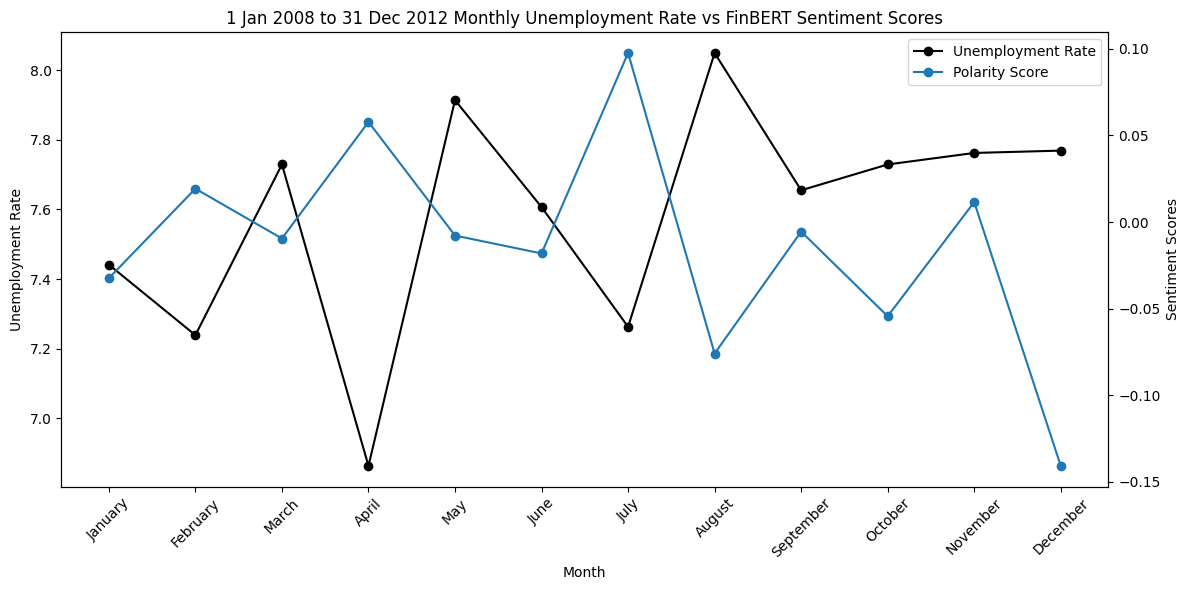

In [37]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Unemployment rate on primary y-axis
ax1.plot(monthly_avg_2008_2012['Month'], monthly_avg_2008_2012['UnemploymentRate'], marker='o', label='Unemployment Rate', color='black')
ax1.set_ylabel('Unemployment Rate')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)

# Sentiment scores on secondary y-axis
ax2 = ax1.twinx()
#ax2.plot(monthly_avg_2008_2012['Month'], monthly_avg_2008_2012['positive_finbert'], marker='o', label='Positive Sentiment')
#ax2.plot(monthly_avg_2008_2012['Month'], monthly_avg_2008_2012['negative_finbert'], marker='o', label='Negative Sentiment')
ax2.plot(monthly_avg_2008_2012['Month'], monthly_avg_2008_2012['polarity_score_finbert'], marker='o', label='Polarity Score')
ax2.set_ylabel('Sentiment Scores')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('1 Jan 2008 to 31 Dec 2012 Monthly Unemployment Rate vs FinBERT Sentiment Scores')
plt.tight_layout()
plt.show()

In [ ]:
# Monthly group for df_merged_by_month_2020_2022

In [33]:
df_merged_by_month_2020_2022 = df_merged_by_month_2020_2022.copy()

In [35]:
# Ensure 'Month' column is treated as categorical with proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_merged_by_month_2020_2022['Month'] = pd.Categorical(df_merged_by_month_2020_2022['Month'], categories=month_order, ordered=True)

monthly_avg_2020_2022 = df_merged_by_month_2020_2022.groupby('Month', observed=True).agg({
    'UnemploymentRate': 'mean',
    'neutral_finbert': 'mean',
    'positive_finbert': 'mean',
    'negative_finbert': 'mean',
    'polarity_score_finbert': 'mean',
    'Reference': 'count'
}).reset_index()
# Rename for clarity
monthly_avg_2020_2022.rename(columns={'Reference': 'NumofSpeeches'}, inplace=True)

# Sort by proper month order
monthly_avg_2020_2022 = monthly_avg_2020_2022.sort_values('Month')

monthly_avg_2020_2022

,Month,UnemploymentRate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,NumofSpeeches
0,January,4.511111,0.649552,0.189739,0.160710,0.029029,9
1,February,4.361111,0.820736,0.142033,0.037231,0.104802,18
2,March,4.330769,0.805045,0.141801,0.053154,0.088646,13
3,April,4.220000,0.693970,0.270718,0.035312,0.235406,15
4,May,4.325000,0.766957,0.152927,0.080116,0.072811,20
5,June,4.146667,0.767290,0.212452,0.020258,0.192194,15
6,July,4.204000,0.786814,0.160036,0.053150,0.106886,25
7,August,5.000000,0.952450,0.042411,0.005139,0.037272,1
8,September,4.533333,0.737077,0.144534,0.118389,0.026144,18
9,October,4.564706,0.706782,0.202421,0.090797,0.111624,17


In [ ]:
# Draw visual

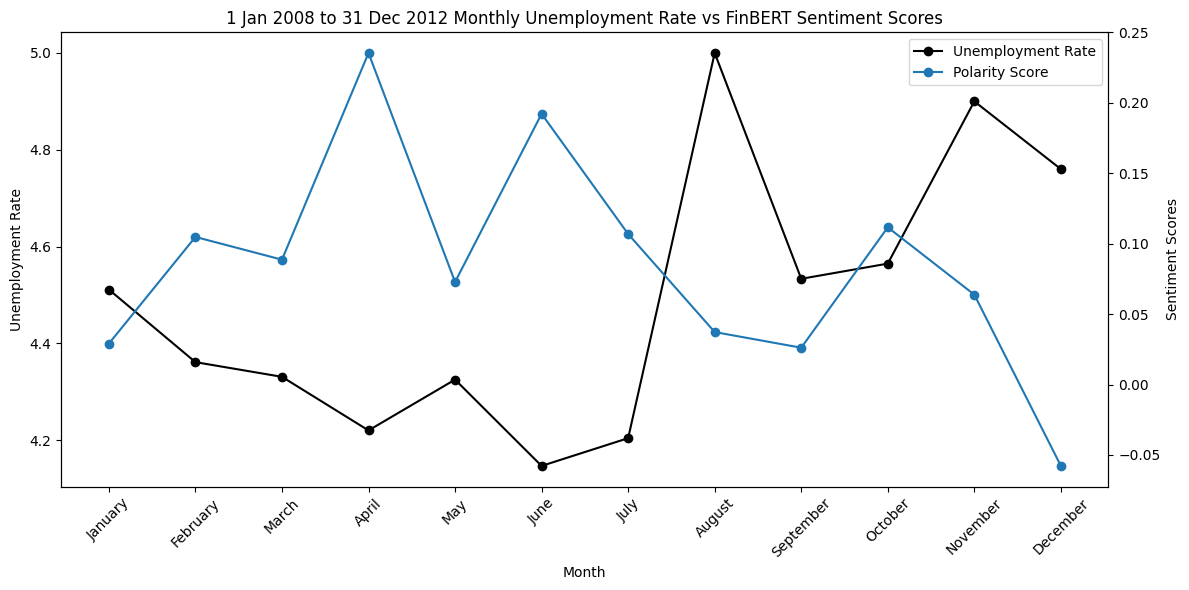

In [38]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Unemployment rate on primary y-axis
ax1.plot(monthly_avg_2020_2022['Month'], monthly_avg_2020_2022['UnemploymentRate'], marker='o', label='Unemployment Rate', color='black')
ax1.set_ylabel('Unemployment Rate')
ax1.set_xlabel('Month')
ax1.tick_params(axis='x', rotation=45)

# Sentiment scores on secondary y-axis
ax2 = ax1.twinx()
#ax2.plot(monthly_avg_2020_2022['Month'], monthly_avg_2020_2022['positive_finbert'], marker='o', label='Positive Sentiment')
#ax2.plot(monthly_avg_2020_2022['Month'], monthly_avg_2020_2022['negative_finbert'], marker='o', label='Negative Sentiment')
ax2.plot(monthly_avg_2020_2022['Month'], monthly_avg_2020_2022['polarity_score_finbert'], marker='o', label='Polarity Score')
ax2.set_ylabel('Sentiment Scores')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('1 Jan 2008 to 31 Dec 2012 Monthly Unemployment Rate vs FinBERT Sentiment Scores')
plt.tight_layout()
plt.show()

In [40]:
#!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 6.5 MB/s eta 0:00:24
    --------------------------------------- 2.1/150.0 MB 6.4 MB/s eta 0:00:24
    --------------------------------------- 2.6/150.0 MB 4.1 MB/s eta 0:00:37
    --------------------------------------- 2.9/150.0 MB 3.6 MB/s eta 0:00:42
    --------------------------------------- 3.1/150.0 MB 3.3 MB/s eta 0:00:45
   - -------------------------------------- 4.5/150.0 MB 3.5 MB/s eta 0:00:43
   - -------------------------------------- 5.2/150.0 MB 3.6 MB/s eta 0:00:40
   - -------------------------------------- 6.0/150.0 MB 3.6 MB/s eta 0:00:40
   - -------------------------------------- 6.8/150.0 MB 3.6 MB/s eta 0:00:40
   - -------------------------------------- 7.1/150.0 MB 3.5 MB/s eta 0:00:42
   -- ------------------------------------- 7.6/150.0 MB 3.4 MB/s eta 0:00:42
   -- ------------------------------------- 8.4/150.0 MB 3.3 MB/s eta 0

In [44]:
# Apply XGBoost for the full data frame df_merged_by_month

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assume df is your DataFrame full time`
df = monthly_avg.copy()

# Encode 'Month' to numerical form
df['Month'] = df['Month'].astype('category').cat.codes

# Features and target
X = df[['Month', 'neutral_finbert', 'positive_finbert', 'negative_finbert', 'polarity_score_finbert', 'NumofSpeeches']]
y = df['UnemploymentRate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluation
print("Random Forest R²:", r2_score(y_test, rf_preds))
print("XGBoost R²:", r2_score(y_test, xgb_preds))


Random Forest R²: -5.8974585000783755
XGBoost R²: -4.150587420984812
